In [87]:
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd
import os
import openpyxl

# Función Objetivo

In [88]:
def f(x,y):
    return 0.5 * (x**4 - 16 * x**2 + 5 * x) + 0.5 * (y**4 - 16 * y**2 + 5 * y)

# Minimos Locales

### (-2.90,2.74)  (2.74,-2.90) (2.74,2.74)

# Minimo Global

### (-2.90,-2.90)

Estos valores son aproximaciones de los minimos reales

# Gradiente de la función

In [89]:
def grad_f(x,y):
    df_dx = 2*x**3 - 16*x + 2.5
    df_dy = 2*y**3 - 16*y + 2.5
    return np.array([df_dx,df_dy])

# Inversa de la Hessiana de la función

In [90]:
def inv_hessian_f(x,y):
    hxx = 6*x**2 - 16
    hyy = 6*y**2 - 16
    if hxx == 0 or hyy == 0:
        return 0
    return np.array([[1/hxx,0],[0,1/hyy]])

# Descenso de Gradiente

In [91]:
def gradient_descent(f,grad_f,xo,yo,alpha = 0.001 , tol = 1e-6 , max_iter = 100):
    historyx_grad = []
    historyy_grad = []
    x = np.array([xo,yo],dtype=float)
    for i in range(max_iter):
        grad = grad_f(x[0],x[1])
        new_x = x - alpha * grad
        if abs(x[0]) > 1e6 or abs(x[1]) > 1e6:
            print("Divergencia detectada en la iteración", i)
            break
        
        if np.linalg.norm(new_x - x) < tol:
            print(f"Cambio pequeño en x en la iteración {i+1}")
            break
            
        x = new_x
        historyx_grad.append(x[0])
        historyy_grad.append(x[1])
    
    result = {  
        "method": "Descenso de Gradiente",
        "input": {"xo": xo, "yo": yo,"alpha":alpha,"tol": tol, "max_iter": max_iter},
        "output": {
            "x_final": float(x[0]),
            "y_final": float(x[1]),
            "f_final": float(f(x[0], x[1])),
            "iterations": i + 1
        }
    }

    filename = f"resultados_gradiente_.json"

    if os.path.exists(filename):
        with open(filename, "r") as f_in:
            data = json.load(f_in)
    else:
        data = []
    data.append(result)
    with open(filename, "w") as f_out:
        json.dump(data, f_out, indent=4)
    print(f"\n Resultados guardados en '{filename}'")

    return x,i,f(x[0],x[1]),historyx_grad,historyy_grad

# Método de Newton

In [92]:
def newthon_method(f,grad_f,inv_hessian_f,xo,yo,tol = 1e-6,max_iter=100):
    x = np.array([xo,yo],dtype=float)
    for i in range(max_iter):
        grad = grad_f(x[0],x[1])
        H_inv = inv_hessian_f(x[0],x[1])

        step = H_inv @ grad
        new_x = x - step
        
        if np.linalg.norm(new_x - x) < tol:
            print(f"Cambio pequeño en x en la iteración {i+1}")
            break

        x = new_x

    result = {  
        "method": "Newton",
        "input": {"xo": xo, "yo": yo, "tol": tol, "max_iter": max_iter},
        "output": {
            "x_final": float(x[0]),
            "y_final": float(x[1]),
            "f_final": float(f(x[0], x[1])),
            "iterations": i + 1
        }
    }

    filename = f"resultados_newton_.json"

    if os.path.exists(filename):
        with open(filename, "r") as f_in:
            data = json.load(f_in)
    else:
        data = []
    data.append(result)
    with open(filename, "w") as f_out:
        json.dump(data, f_out, indent=4)
    print(f"\n Resultados guardados en '{filename}'")

    return x,i,f(x[0],x[1])

### Se tomó como criterio de parada el cambio pequeño de x de un paso hacia otro. La variable result se utiliza para guardar todos los datos de interes para su futura comparación

# Casos Prueba

Para correr los casos prueba debe rellenar las listas x_ini(x iniciales) , y_ini(y iniciales) y alphas(tamaños de saltos).Al correr el método tester de los algoritmos implementados se crean 2 archivos .json uno para cada método respectivamente . En dichos archivos se almacenarán todos los datos referentes a cada llamada realizada a los métodos.

In [93]:
x_ini = [-2]
y_ini = [-2]
alphas = [0.001]

if os.path.exists("comparativa_gradiente.csv"):
    os.remove("comparativa_gradiente.csv")
if os.path.exists("comparativa_gradiente.xlsx"):
    os.remove("comparativa_gradiente.xlsx")
if os.path.exists("comparativa_newton_gradiente.csv"):
    os.remove("comparativa_newton_gradiente.csv")
if os.path.exists("comparativa_newton_gradiente.xlsx"):
    os.remove("comparativa_newton_gradiente.xlsx")
if os.path.exists("resultados_gradiente_.json"):
    os.remove("resultados_gradiente_.json")
if os.path.exists("resultados_newton_.json"):
    os.remove("resultados_newton_.json")
if os.path.exists("comparativa_newton.csv"):
    os.remove("comparativa_newton.csv")
if os.path.exists("comparativa_newton.xlsx"):
    os.remove("comparativa_newton.xlsx")

# def tester(x_ini,y_ini,alphas):
#     for i in range(len(x_ini)):
#         newthon_method(f,grad_f,inv_hessian_f,x_ini[i],y_ini[i])
#         gradient_descent(f,grad_f,x_ini[i],y_ini[i],alphas[i])

# tester(x_ini,y_ini,alphas)

#Experimentos usados en el informe para la comparacion entre ambos metodos
for i in range(-10,11):
    for j in range(-10,11):
        newthon_method(f,grad_f,inv_hessian_f,10 * i,10 * j)
        gradient_descent(f,grad_f,10 * i,10 * j,0.001)


Cambio pequeño en x en la iteración 14

 Resultados guardados en 'resultados_newton_.json'
Divergencia detectada en la iteración 2

 Resultados guardados en 'resultados_gradiente_.json'
Cambio pequeño en x en la iteración 14

 Resultados guardados en 'resultados_newton_.json'
Divergencia detectada en la iteración 2

 Resultados guardados en 'resultados_gradiente_.json'
Cambio pequeño en x en la iteración 14

 Resultados guardados en 'resultados_newton_.json'
Divergencia detectada en la iteración 2

 Resultados guardados en 'resultados_gradiente_.json'
Cambio pequeño en x en la iteración 14

 Resultados guardados en 'resultados_newton_.json'
Divergencia detectada en la iteración 2

 Resultados guardados en 'resultados_gradiente_.json'
Cambio pequeño en x en la iteración 14

 Resultados guardados en 'resultados_newton_.json'
Divergencia detectada en la iteración 2

 Resultados guardados en 'resultados_gradiente_.json'
Cambio pequeño en x en la iteración 14

 Resultados guardados en 'resu

# Tabla de Comparación entre algoritmos

Aquí se mostrara una comparación entre los métodos en cada una de las llamadas realizadas

In [94]:
# --- Cargar los JSON ---
with open("resultados_newton_.json", "r") as f:
    newton_data = json.load(f)

with open("resultados_gradiente_.json", "r") as f:
    grad_data = json.load(f)

# --- Crear tabla comparativa ---
tabla = []

for n, g in zip(newton_data, grad_data):
    fila = {
        # Columnas Newton
        'X inicial Newton': n['input']['xo'],
        'Y inicial Newton': n['input']['yo'],
        'X final Newton': n['output']['x_final'],
        'Y final Newton': n['output']['y_final'],
        'Valor final Newton': n['output']['f_final'],
        'Iteraciones Newton': n['output']['iterations'],

        # Columnas Descenso de Gradiente
        'Tamaño de paso': g['input']['alpha'],
        'X inicial Gradiente': g['input']['xo'],
        'Y inicial Gradiente': g['input']['yo'],
        'X final Gradiente': g['output']['x_final'],
        'Y final Gradiente': g['output']['y_final'],
        'Valor final Gradiente': g['output']['f_final'],
        'Iteraciones Gradiente': g['output']['iterations'],
    }
    tabla.append(fila)

# --- Crear DataFrame ---
df_comparativa = pd.DataFrame(tabla)

# --- Mostrar tabla completa ---
# Mostrar todas las columnas y expandir ancho máximo
pd.set_option("display.max_columns", None)  # mostrar todas las columnas
pd.set_option("display.width", 200)         # ancho total de la consola
pd.set_option("display.expand_frame_repr", False)
# print(df_comparativa)
df_comparativa.to_csv("comparativa_newton_gradiente.csv", index=False)
df_comparativa.to_excel("comparativa_newton_gradiente.xlsx", index=False)

# Tabla del Método de Descenso de Gradiente
### Se utiliza para ver para un tamaño de paso específico el comportamiento del método

In [95]:
tabla2 = []
for n, g in zip(newton_data, grad_data):
    fila = {
        # Columnas Descenso de Gradiente
        'Tamaño de paso': g['input']['alpha'],
        'X inicial Gradiente': g['input']['xo'],
        'Y inicial Gradiente': g['input']['yo'],
        'X final Gradiente': g['output']['x_final'],
        'Y final Gradiente': g['output']['y_final'],
        'Valor final Gradiente': g['output']['f_final'],
        'Iteraciones Gradiente': g['output']['iterations'],
    }
    tabla2.append(fila)

df_grad = pd.DataFrame(tabla2)
pd.set_option("display.max_columns", None)  # mostrar todas las columnas
pd.set_option("display.width", 200)         # ancho total de la consola
pd.set_option("display.expand_frame_repr", False)
print(df_grad)
df_grad.to_csv("comparativa_gradiente.csv", index=False)
df_grad.to_excel("comparativa_gradiente.xlsx", index=False)

     Tamaño de paso  X inicial Gradiente  Y inicial Gradiente  X final Gradiente  Y final Gradiente  Valor final Gradiente  Iteraciones Gradiente
0             0.001                 -100                 -100      -1.368139e+07      -1.368139e+07           3.503652e+28                      3
1             0.001                 -100                  -90      -1.368139e+07      -5.102648e+06           1.785722e+28                      3
2             0.001                 -100                  -80      -1.368139e+07      -1.674659e+06           1.752219e+28                      3
3             0.001                 -100                  -70      -1.368139e+07      -4.643141e+05           1.751828e+28                      3
4             0.001                 -100                  -60      -1.368139e+07      -1.017836e+05           1.751826e+28                      3
..              ...                  ...                  ...                ...                ...                    ...  

In [96]:
tabla3 = []
for n, g in zip(newton_data, grad_data):
    fila = {
        # Columnas Newton
        'X inicial Newton': n['input']['xo'],
        'Y inicial Newton': n['input']['yo'],
        'X final Newton': n['output']['x_final'],
        'Y final Newton': n['output']['y_final'],
        'Valor final Newton': n['output']['f_final'],
        'Iteraciones Newton': n['output']['iterations'],
    }
    tabla3.append(fila)
df_newton = pd.DataFrame(tabla3)
pd.set_option("display.max_columns", None)  # mostrar todas las columnas
pd.set_option("display.width", 200)         # ancho total de la consola
pd.set_option("display.expand_frame_repr", False)
df_newton.to_csv("comparativa_newton.csv", index=False)
df_newton.to_excel("comparativa_newton.xlsx", index=False)

# Gráficos para la comparación de los métodos

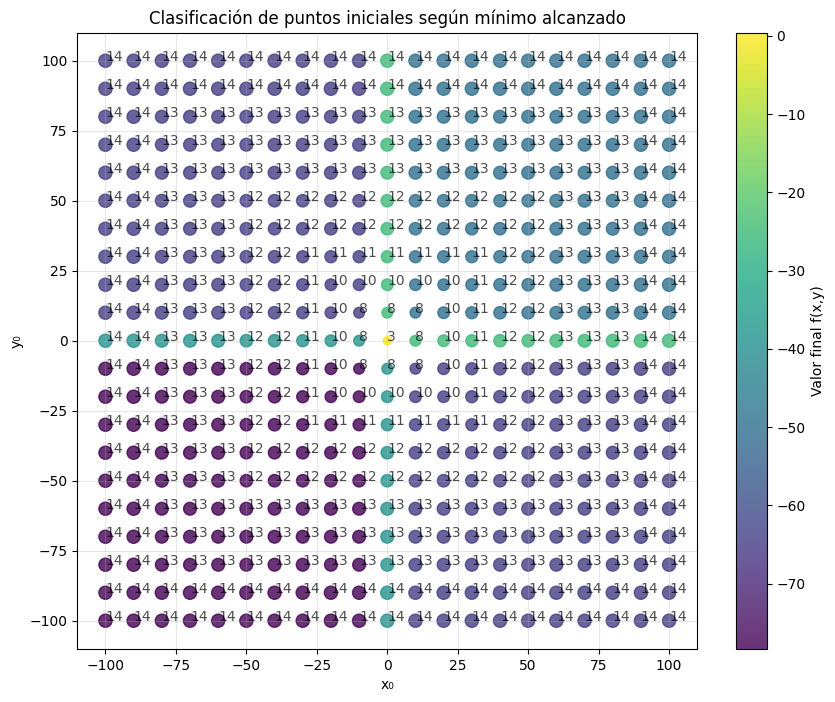

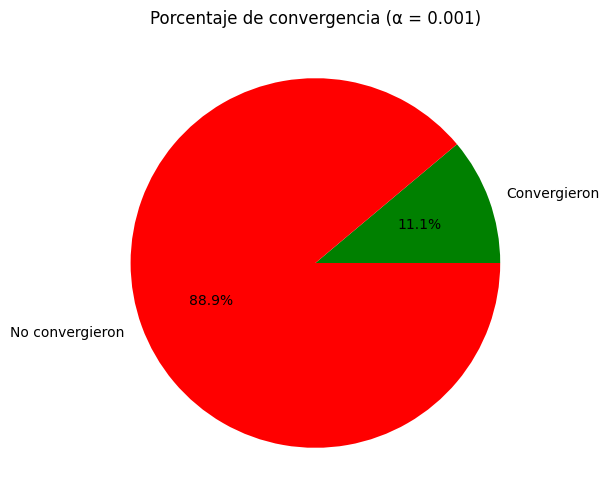

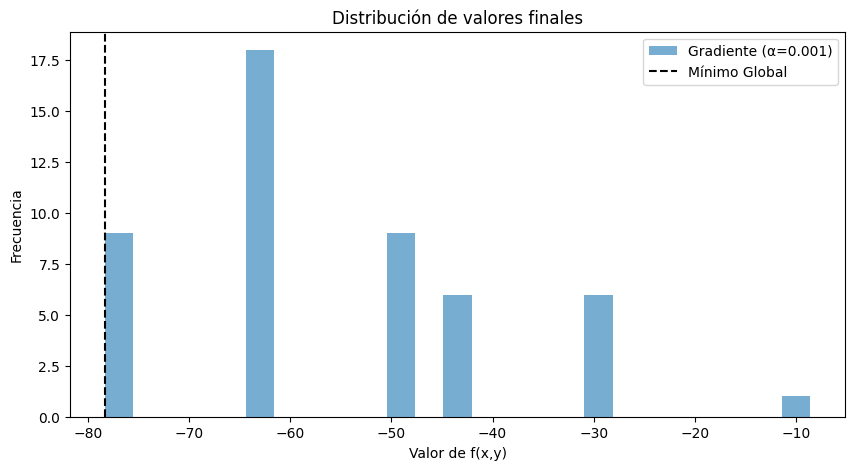

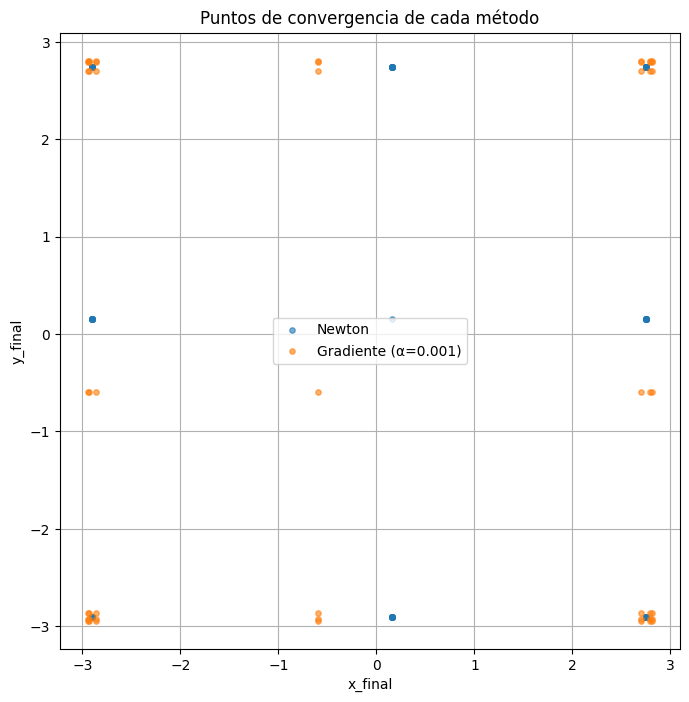

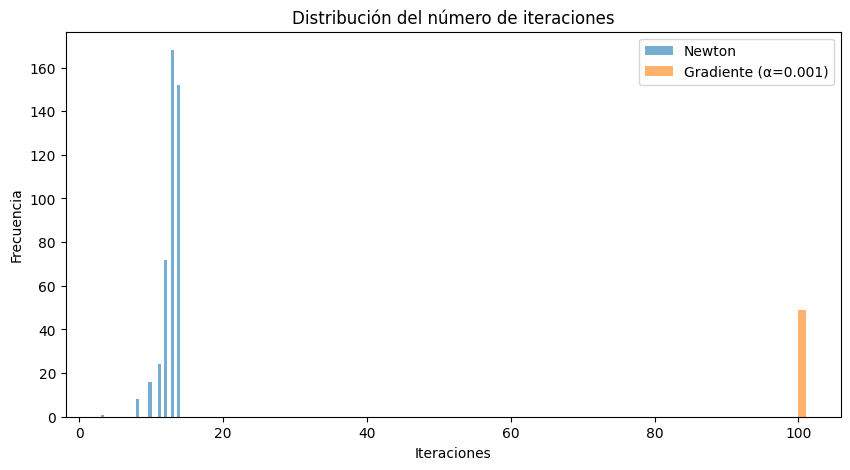

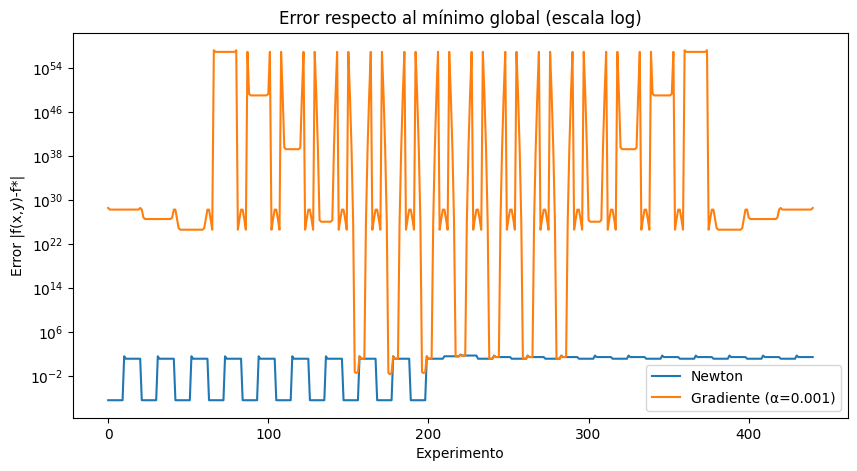

In [ ]:
df = pd.read_excel("comparativa_newton_gradiente.xlsx")
f_global = -78.332331

#Para tener los experimentos de Descenso de Gradiente que convergen
grad_conv = df_comparativa[
    (df_comparativa["Valor final Gradiente"].abs() < 1e6)
]

grad_conv_2 = df_grad[
    (df_grad["Valor final Gradiente"].abs() < 1e6)
]

df_newton = pd.read_csv("comparativa_newton.csv")

plt.figure(figsize=(10,8))

scatter = plt.scatter(
    df_newton["X inicial Newton"], df_newton["Y inicial Newton"],
    c=df_newton["Valor final Newton"],
    cmap="viridis",
    s=20 + 5 * np.array(df_newton["Iteraciones Newton"]),   # tamaño según iteraciones
    alpha=0.8
)

plt.colorbar(scatter, label="Valor final f(x,y)")
plt.xlabel("x₀")
plt.ylabel("y₀")
plt.title("Clasificación de puntos iniciales según mínimo alcanzado")

# Opcional: mostrar iteraciones junto a algunos puntos
for x, y, it in zip(df_newton["X inicial Newton"], df_newton["Y inicial Newton"], df_newton["Iteraciones Newton"]):
    if it in [3, 8, 10, 11, 12, 13, 14]:  
        plt.annotate(str(it), (x, y), fontsize=10, alpha=0.7)

plt.grid(alpha=0.3)
plt.show()



#Porcentaje del Gradiente en alpha = 0.001
conv = (df_grad["Valor final Gradiente"].abs() < 1e6).sum()
no_conv = (df_grad["Valor final Gradiente"].abs() >= 1e6).sum()
labels = ["Convergieron", "No convergieron"]
values = [conv, no_conv]
plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct="%1.1f%%", colors=["green", "red"])
plt.title("Porcentaje de convergencia (α = 0.001)")
plt.show()

# Distribucion de valores finales(f(x,y))
plt.figure(figsize=(10,5))
# plt.hist(df['Valor final Newton'], bins=25, alpha=0.6, label="Newton")
plt.hist(grad_conv_2['Valor final Gradiente'], bins=25, alpha=0.6, label="Gradiente (α=0.001)")
plt.axvline(f_global, color='black', linestyle='--', label="Mínimo Global")
plt.title("Distribución de valores finales")
plt.xlabel("Valor de f(x,y)")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

# dispersion (X_final, Y_final)

plt.figure(figsize=(8,8))
plt.scatter(df['X final Newton'], df['Y final Newton'], s=15, alpha=0.6, label="Newton")
plt.scatter(grad_conv['X final Gradiente'], grad_conv['Y final Gradiente'], s=15, alpha=0.6, label="Gradiente (α=0.001)")
plt.title("Puntos de convergencia de cada método")
plt.xlabel("x_final")
plt.ylabel("y_final")
plt.legend()
plt.grid(True)
plt.show()

# Comparacion de iteraciones

plt.figure(figsize=(10,5))
plt.hist(df['Iteraciones Newton'], bins=25, alpha=0.6, label="Newton")
plt.hist(grad_conv_2['Iteraciones Gradiente'], bins=[99,100,101], alpha=0.6, label="Gradiente (α=0.001)")
plt.title("Distribución del número de iteraciones")
plt.xlabel("Iteraciones")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

#Comparacion de errores con respecto al minimo global experimento por experimento

df['Error_N'] = np.abs(df['Valor final Newton'] - f_global)
df['Error_G'] = np.abs(df['Valor final Gradiente'] - f_global)

plt.figure(figsize=(10,5))
plt.plot(df['Error_N'], label="Newton")
plt.plot(df['Error_G'], label="Gradiente (α=0.001)")
plt.yscale("log")
plt.title("Error respecto al mínimo global (escala log)")
plt.xlabel("Experimento")
plt.ylabel("Error |f(x,y)-f*|")
plt.legend()
plt.show()